<a href="https://colab.research.google.com/github/Ivan8Garcia/data-science/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [65]:
import pandas as pd


In [66]:
datos=pd.read_csv("/content/prestacar.csv")

In [67]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [68]:
X=datos.drop(columns="moroso",axis=1)
y=datos.moroso

In [69]:
from sklearn.tree import DecisionTreeClassifier

modelo=DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)


1.0

In [70]:
print(f'La precision del modelo es: {modelo.score(X,y)}')

La precision del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X,X_test,y,y_test=train_test_split(X,y,test_size=0.15,stratify=y ,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y ,random_state=5)

In [73]:
#en esta celda vemos que la exactitud del entrenamiento es de 100 porque solamente lo memorizó
#y al momento de validar el modelo no fue lo suficientemente bueno porque no se incluyó "max_depth"
modelo=DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validacion es de: 0.8501001654908109


In [74]:
#la mejor practica es colocando una profundidad maxima
#como resultado obtenemos algo mas eficaz que la celda anterior
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
La exactitud del modelo con el conjunto de validacion es de: 0.9056702377841651


### Evaluando el modelo

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
y_previsto= modelo.predict(X_val)
matriz_confusion=confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10355   124]
 [  959    43]]


In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

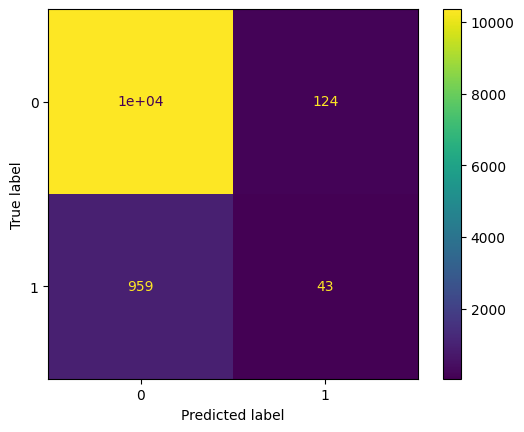

In [78]:
visualizacion= ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)
visualizacion.plot();

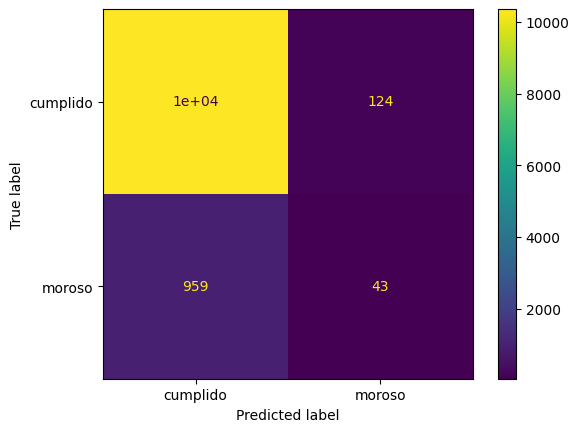

In [79]:
#como se lee esta matriz, en el cuadrante inferior izquierdo nos dice que tenemos 961 clientes cumplidores(eje x) pero
#no lo son en realidad no son cumplidos si no que son morosos(eje Y) en realidad. y predijo 41 morosos que si son morosos.
#(cuadrante derecho inferior).
# de igual manera acertó que 8828 seran cumplidores(cuadrante izq superior),cuando en realidad si son cumplidores(en el dataset).
#y por ultimo predijo que 78 morosos son cumplidores(no son cumplidores,cuadrante der.superior).
visualizacion= ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=["cumplido","moroso"])
visualizacion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [80]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [81]:
45/(45+123)  #precision

0.26785714285714285

In [82]:
print(f'La precisión del modelo es de: {precision_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es de: {accuracy_score(y_val,y_previsto)}')
print(f'La sensibilidad (recall) del modelo es de: {recall_score(y_val,y_previsto)}')
print(f'El f1 score del modelo es de: {f1_score(y_val,y_previsto)}')

La precisión del modelo es de: 0.25748502994011974
La exactitud (accuracy) del modelo es de: 0.9056702377841651
La sensibilidad (recall) del modelo es de: 0.04291417165668663
El f1 score del modelo es de: 0.07356715141146279


### Curva ROC

In [83]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [84]:
from sklearn.metrics import RocCurveDisplay

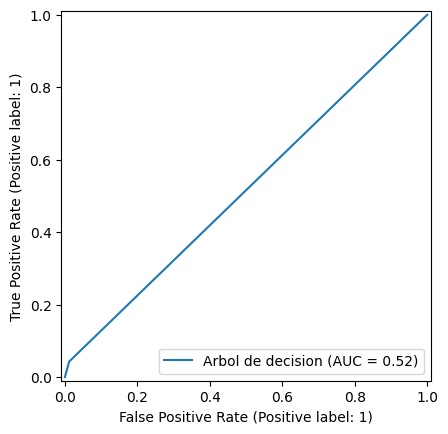

In [85]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name="Arbol de decision");

In [86]:
from sklearn.metrics import roc_auc_score

In [87]:
print(f'El area bajo la curva ROC es:{roc_auc_score(y_val,y_previsto)}')

El area bajo la curva ROC es:0.5155404907333915


### Curva de  precisión x sensibilidad

In [88]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [89]:
from sklearn.metrics import PrecisionRecallDisplay

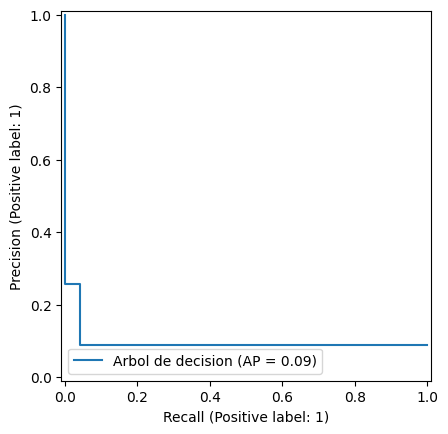

In [90]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name="Arbol de decision");

In [91]:
from sklearn.metrics import average_precision_score

In [92]:
print(f"El score promedio de Precision vs Recall es de:{average_precision_score(y_val,y_previsto)}")

El score promedio de Precision vs Recall es de:0.09457906606749295


### Informe de métricas

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

### Validación cruzada con sensibilidad

### Estratificando los datos

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo

#**Desafio Randomforest**

El primer paso es identificar cómo importar el algoritmo Random Forest a partir de la documentación, que siempre trae ejemplos de cómo utilizar la función. La importación se puede hacer con el siguiente código:

In [95]:
from sklearn.ensemble import RandomForestClassifier

Ahora que hemos importado el algoritmo, solo necesitamos instanciar el RandomForestClassifier en una variable y utilizar el parámetro max_depth = 10 así como hicimos con el árbol de decisión. Esto evitará que el modelo se ajuste demasiado a los datos de entrenamiento. Después de eso, podemos ajustar el modelo con datos de entrenamiento y verificar el resultado de la precisión:

In [96]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo.score(X_val, y_val)}')

Precisión de entrenamiento: 0.9152439024390244
Precisión de validación: 0.9128124727811167


Al ejecutar el código, obtendremos el siguiente resultado:

Precisión de entrenamiento: 0.9154761904761904

Precisión de validación: 0.9127253723543245

Este resultado muestra que el RandomForest tuvo una precisión mejor que el árbol de decisión, indicando que el modelo tiene una tasa de aciertos general mejor.

Para completar, podemos generar una matriz de confusión a partir del modelo y verificar la cantidad de aciertos y errores para cada clase. Podemos crear la matriz con el siguiente código:

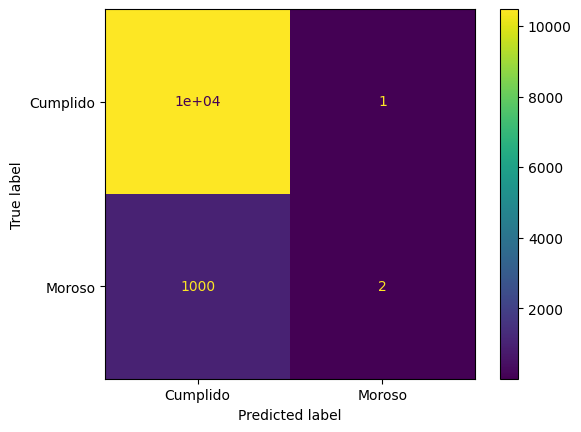

In [97]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();

A partir de esta matriz, nos damos cuenta de que a pesar de una precisión mayor, el modelo RandomForest no logra identificar casi ningún cliente moroso, indicando un resultado bastante malo en relación al modelo de árbol de decisión.

#**Desafio Diabetes**

**1 -** Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

**2 -** Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

**3 -** La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

**4 -** La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.



In [98]:
import pandas as pd


In [99]:
datos=pd.read_csv("/content/diabetes.csv")
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


La base de datos tiene solo 394 filas y 6 columnas. Podemos observar 6 columnas de datos: glicemia, presion_sanguinea, pliegue_cutaneo_triceps, insulina, imc y diabetes. La clasificación del modelo debe hacerse para la columna de diabetes, que presenta valores de 0 para ausencia de diabetes y 1 para presencia de diabetes, por lo tanto, esta es la variable objetivo y el resto son variables explicativas. Podemos realizar la división de los datos usando el código:

In [100]:
X=datos.drop("diabetes",axis=1)
y=datos.diabetes

**2 -** Para realizar la división de datos entre entrenamiento, validación y prueba, podemos usar el método **train_test_split** de la biblioteca Scikit-Learn. Primero debemos importar la función con el código:

In [101]:
from sklearn.model_selection import train_test_split

La primera división se hará de los datos de prueba y luego con el resto se hará una nueva división entre entrenamiento y validación, usando el parámetro stratify = y para mantener la proporción de los datos de la variable objetivo entre los conjuntos. Dado que la base de datos tiene pocos registros, solo se dividirá el 5% de los datos para prueba para que haya una cantidad mayor de registros en la base de datos de entrenamiento:

In [102]:
X, X_test, y, y_test = train_test_split(X, y, stratify = y, test_size = 0.05, random_state = 5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = 5)

**3 -** La primera etapa para la creación de los modelos será la importación de los algoritmos DecisionTreeClassifier y RandomForestClassifier, usando el código:

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Después de la importación de los algoritmos, podemos instanciar los modelos y almacenarlos en variables, aquí se eligieron los valores de max_depth = 3 para el DecisionTree y max_depth = 2 para el RandomForest:

In [104]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

Para hacer el ajuste de los modelos podemos usar el método fit() y para evaluar la tasa de acierto, el método score():

In [105]:
arbol.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {arbol.score(X_train, y_train)}')
print(f'Precisión de prueba: {arbol.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7571428571428571
Precisión de prueba: 0.776595744680851


In [106]:
random_forest.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {random_forest.score(X_train, y_train)}')
print(f'Precisión de prueba: {random_forest.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7285714285714285
Precisión de prueba: 0.7127659574468085


4 - Para generar la matriz de confusión, primero es necesario importar la función ConfusionMatrixDisplay, usando el código:

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay

Hecho esto, basta con utilizar el método predict() para hacer la predicción de datos con los modelos y luego utilizar los valores reales y previstos en el método from_predictions() de la matriz de confusión:

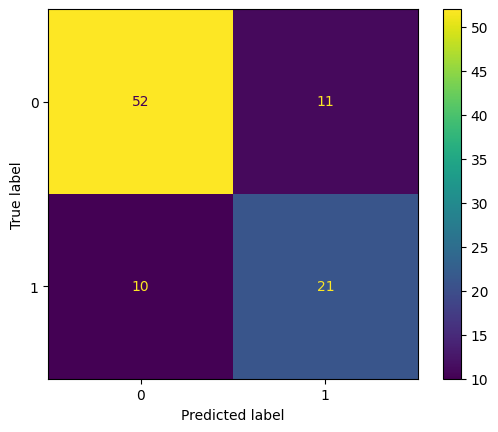

In [108]:
prediccion_arbol = arbol.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

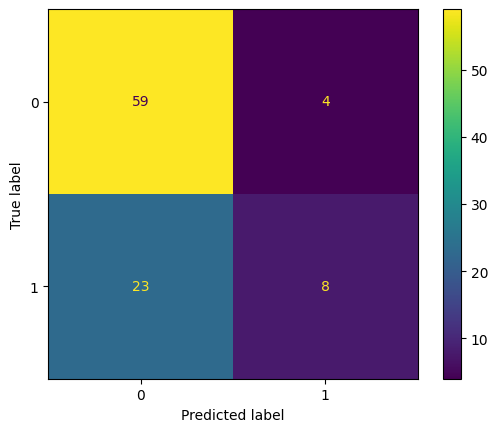

In [109]:
prediccion_rf = random_forest.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);

1 - Para extraer las métricas de un modelo, primero importaremos las funciones que calculan automáticamente:

**accuracy_score**

**recall_score**

**precision_score**

**f1_score**

In [110]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Ahora vamos a calcular cada una de las métricas para los dos modelos, utilizando los datos reales y los valores previstos:

In [111]:
prediccion_arbol = arbol.predict(X_val)

print(f'Precisión (Decision Tree): {accuracy_score(y_val, prediccion_arbol)}')
print(f'Recall (Decision Tree): {recall_score(y_val, prediccion_arbol)}')
print(f'Precisión (Decision Tree): {precision_score(y_val, prediccion_arbol)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, prediccion_arbol)}')

Precisión (Decision Tree): 0.776595744680851
Recall (Decision Tree): 0.6774193548387096
Precisión (Decision Tree): 0.65625
F1_Score (Decision Tree): 0.6666666666666666


In [112]:
prediccion_rf = random_forest.predict(X_val)

print(f'Precisión (Random Forest): {accuracy_score(y_val, prediccion_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, prediccion_rf)}')
print(f'Precisión (Random Forest): {precision_score(y_val, prediccion_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, prediccion_rf)}')

Precisión (Random Forest): 0.7127659574468085
Recall (Random Forest): 0.25806451612903225
Precisión (Random Forest): 0.6666666666666666
F1_Score (Random Forest): 0.37209302325581395


2 - Para obtener el gráfico de la curva ROC y la métrica AUC, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [113]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

Para presentar los resultados de la curva ROC en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

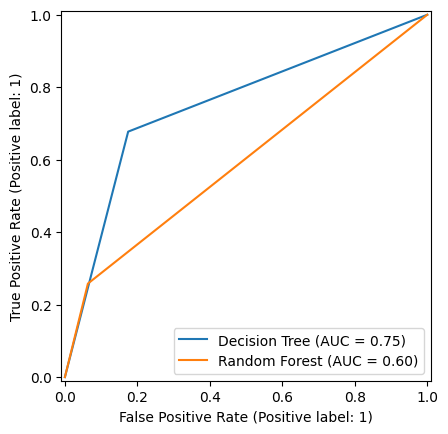

In [114]:
curva_roc = RocCurveDisplay.from_predictions(y_val, prediccion_arbol, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, prediccion_rf, name = 'Random Forest', ax = curva_roc.ax_)

Ahora solo falta usar el método roc_auc_score para calcular el AUC de los dos modelos:

In [115]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, prediccion_arbol)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, prediccion_rf)}')

AUC (Decision Tree): 0.7514080901177674
AUC (Random Forest): 0.5972862263184844


3 - Para obtener el gráfico de la curva de precisión x recall y la métrica AP, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [116]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

Para presentar los resultados de la curva de precisión x recall en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

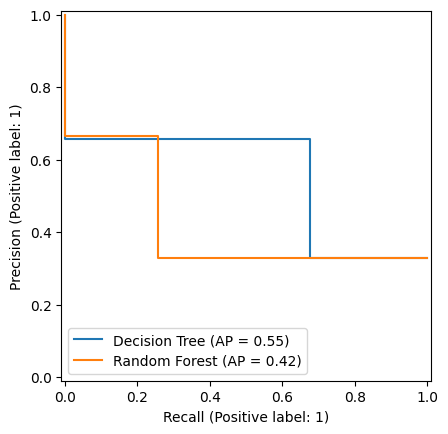

In [117]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prediccion_arbol, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prediccion_rf, name = 'Random Forest', ax = curva_precision_recall.ax_)

Ahora solo falta usar el método average_precision_score para calcular el AP de los dos modelos:

In [118]:
print(f'AP (Decision Tree): {average_precision_score(y_val, prediccion_arbol)}')
print(f'AP (Random Forest): {average_precision_score(y_val, prediccion_rf)}')

AP (Decision Tree): 0.5509394303363074
AP (Random Forest): 0.41672386181651794


4 - Para generar el informe de métricas, primero necesitamos importar la función classification_report:

In [119]:
from sklearn.metrics import classification_report

A partir de ahí, podemos generar los informes para cada uno de los modelos, utilizando los valores reales y previstos:

In [120]:
print('Decision Tree')
print(classification_report(y_val, prediccion_arbol))
print('Random Forest')
print(classification_report(y_val, prediccion_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

Random Forest
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        63
           1       0.67      0.26      0.37        31

    accuracy                           0.71        94
   macro avg       0.69      0.60      0.59        94
weighted avg       0.70      0.71      0.67        94

